# FashionMnist Classification

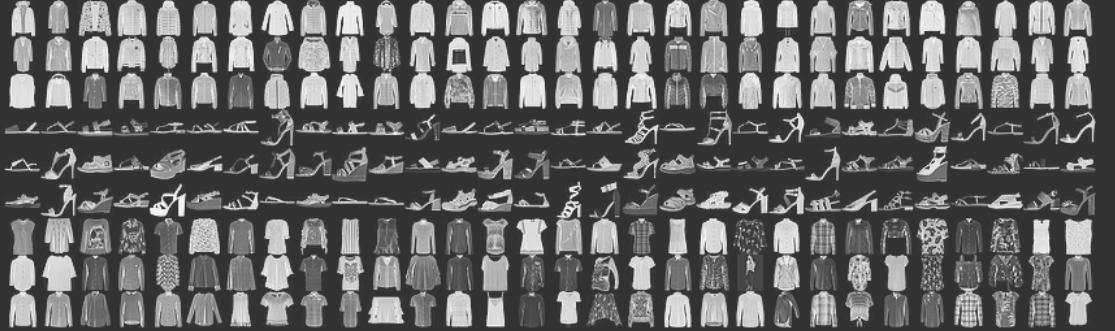

In [1]:
from IPython import display
display.Image("https://peltarion.com/static/fashion-mnist_long.png")

Fashion-MNIST is a dataset of images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.


Each training and test example is assigned to one of the following labels:

- **0** : T-shirt/top
- **1** : Trouser
- **2** : Pullover
- **3** : Dress
- **4** : Coat
- **5** : Sandal
- **6** : Shirt
- **7** : Sneaker
- **8** : Bag
- **9** : Ankle boot

## Import Libraries

In [2]:
#import the dataset
from keras.datasets import fashion_mnist

#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import Preparations for the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

#import the model
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans

#ignore warnings of python
import warnings
warnings.filterwarnings('ignore')

## Part 1 : Familiarity with the dataset

In [12]:
# Load the data
data = fashion_mnist.load_data()

In [13]:
# Split the data to training and testing
((train_X, train_Y), (test_X, test_Y)) = data

In [14]:
print("The shape of testing the data :",test_X.shape)
print("The shape of training the data :",train_X.shape)

The shape of testing the data : (10000, 28, 28)
The shape of training the data : (60000, 28, 28)


In [15]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

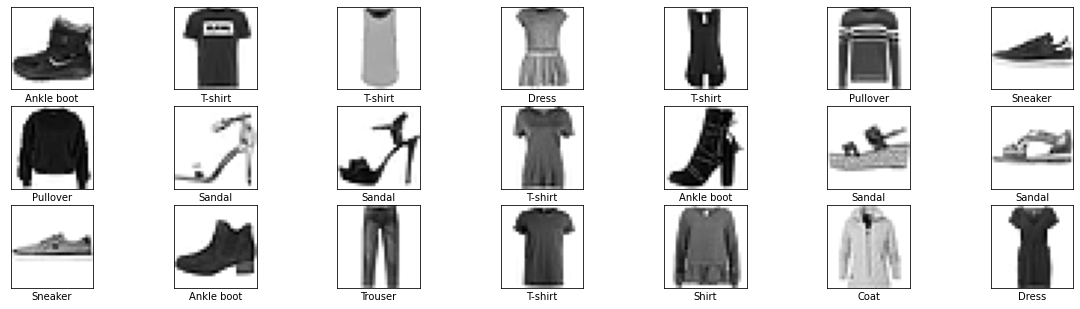

In [16]:
# Plot the first 25 elements from training
plt.figure(figsize=(20,7))
for i in range(21):
    plt.subplot(4,7,i+1)
    plt.imshow(train_X[i], cmap='binary')
    plt.xlabel(class_names[train_Y[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [21]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='summer')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

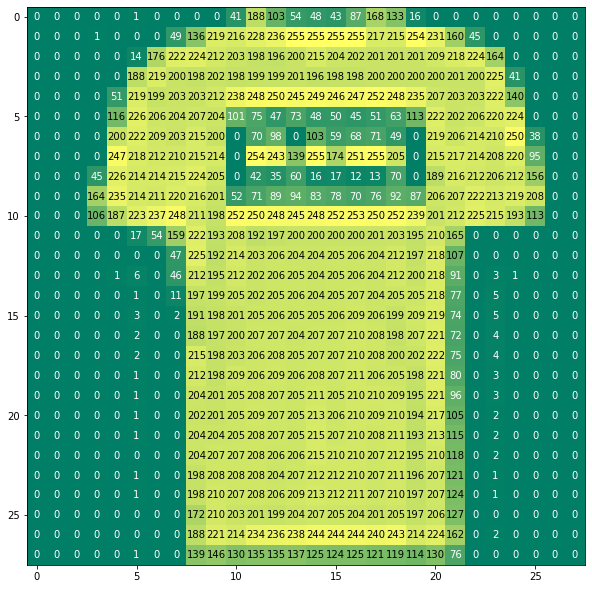

In [28]:
#Visualizing for Fashion MNIST
fig = plt.figure(figsize = (10,12)) 
ax = fig.add_subplot(111)
visualize_input(train_X[1], ax)

## Part 2 : Preparation dataset for analysis

In [29]:
# Reshape the data 
train_X = train_X.reshape(60000, 28*28)
test_X = test_X.reshape(10000,28*28)

In [30]:
print("The shape of testing the data :",test_X.shape)
print("The shape of training the data :",train_X.shape)

The shape of testing the data : (10000, 784)
The shape of training the data : (60000, 784)


In [31]:
df = pd.DataFrame(train_X)

In [32]:
# Change name of columns
cols = list(df.columns)
df.rename(columns={cols[i]:'Pixel'+str(i) for i in range(len(cols)) } , inplace=True)

In [33]:
# Add label columns
df.insert(len(df.columns), 'fashion_item', train_Y)

In [34]:
print("The shape of training the data :",df.shape)

The shape of training the data : (60000, 785)


In [35]:
df.head(7)

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,fashion_item
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,22,...,0,0,0,133,167,73,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [36]:
df.describe()

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,fashion_item
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,14.434650,...,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883,4.500000
std,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,38.204702,...,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829,2.872305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
max,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000,9.000000


In [37]:
# Check for missing values
df.isnull().sum().sum()

0

In [38]:
# Rename the column׳s label so that it is displayed in the graph as a word and not as a number
df['fashion'] = df['fashion_item'].copy()
k=df['fashion'].replace({0 :'T-Shirt/Top',
    1 :'Trouser',
    2 :'Pullover',
    3 :'Dress',
    4 :'Coat',
    5 :'Sandal',
    6 :'Shirt',
    7 :'Sneaker',
    8 :'Bag',
    9 :'Ankle Boot'})


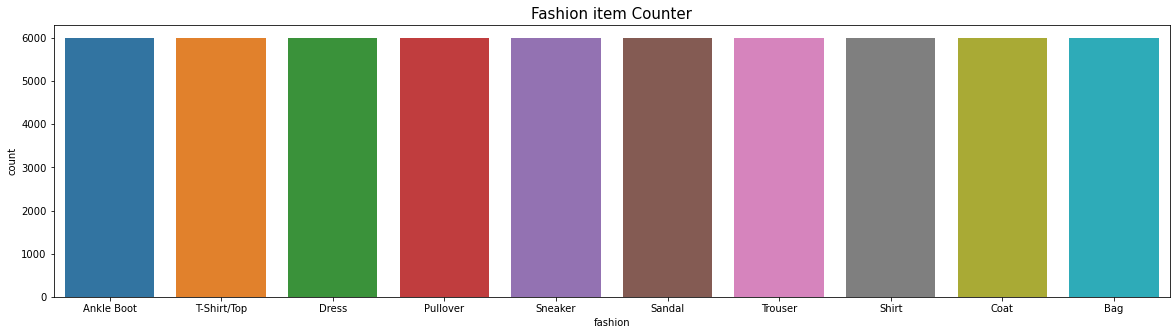

In [39]:
# plot graph for count values of fashion item
axis=plt.subplots(figsize = (20,5))
plt.title("Fashion item Counter", size=15)
sns.countplot(k)

plt.show()

In [40]:
# Return to original Dataframe
df.drop(['fashion'], axis=1, inplace=True)

## Part 3 : Explore the data

- We will divide the data into training and test, since we have already split the data <br>
we will test each model in a test from the trainig so that in the end <br>
the best model we will use for the real test.

In [41]:
# Divide the data into training and test
X = df.drop(columns=['fashion_item'])
Y = df['fashion_item']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100)
test_X = test_X.copy() 

#### Scaling the data

In [42]:
X_train = X_train / 255
X_test = X_test / 255
test_X = test_X / 255

In [43]:
X_train.describe()

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,...,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000
mean,0.000004,0.000021,0.000121,0.000418,0.001011,0.001705,0.003251,0.008495,0.022112,0.056571,...,0.135407,0.090516,0.064375,0.069318,0.089694,0.070424,0.033465,0.010736,0.003300,0.000283
std,0.000405,0.000834,0.003170,0.010177,0.017400,0.023643,0.032496,0.054573,0.092565,0.149813,...,0.225520,0.190997,0.163904,0.171063,0.203298,0.177138,0.115897,0.068196,0.036363,0.007907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.223529,0.031373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.062745,0.098039,0.466667,0.643137,0.878431,0.901961,0.866667,0.866667,0.996078,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667


In [44]:
print("The shape of Testing the data :",X_test.shape)
print("The shape of Training the data :",X_train.shape)
print("The shape of real Testing of the data :",test_X.shape)

The shape of Testing the data : (12000, 784)
The shape of Training the data : (48000, 784)
The shape of real Testing of the data : (10000, 784)


In [43]:
# Calculates the correlation between any two features
corr = df.corr().abs()

In [44]:
corr.sample(5)

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,fashion_item
Pixel314,0.005702,0.015361,0.029352,0.033671,0.038480,0.050872,0.066405,0.086554,0.098359,0.072447,...,0.096005,0.121884,0.284294,0.428467,0.411931,0.265264,0.078817,0.014696,0.012149,0.102130
Pixel208,0.002276,0.001844,0.008016,0.013777,0.025876,0.038669,0.048239,0.076557,0.126022,0.221664,...,0.189341,0.106377,0.121777,0.178252,0.174432,0.093878,0.005633,0.035020,0.015176,0.546184
Pixel255,0.005231,0.035677,0.080740,0.071249,0.088808,0.090268,0.074554,0.073685,0.071894,0.055942,...,0.156860,0.178912,0.022835,0.073096,0.038136,0.036065,0.070843,0.043551,0.031205,0.012774
Pixel91,0.002727,0.016250,0.041980,0.046320,0.062088,0.088390,0.126370,0.194013,0.260301,0.279063,...,0.276170,0.256490,0.184399,0.262187,0.301330,0.224772,0.056713,0.008431,0.005262,0.360521
Pixel649,0.003364,0.011669,0.007525,0.022527,0.030035,0.037248,0.036892,0.019677,0.001066,0.046309,...,0.076398,0.006201,0.272836,0.498536,0.501098,0.355147,0.165082,0.081295,0.027209,0.191128


In [45]:
# New dataframe that showing the correlation higher than 0.6
corr_threshold  = corr[corr.fashion_item > 0.6]

In [46]:
# We look for the correlation only between the pixels and the fashion item
corr_threshold = corr_threshold.drop(['fashion_item'])

In [47]:
corr_threshold.sample(7)

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,fashion_item
Pixel444,0.003814,0.006759,0.003371,0.008751,0.012293,0.015339,0.001418,0.033084,0.075805,0.176857,...,0.228748,0.154218,0.163859,0.108183,0.023230,0.156155,0.165515,0.089101,0.030171,0.645572
Pixel360,0.002077,0.008662,0.009938,0.013418,0.018242,0.021487,0.001801,0.027717,0.068664,0.170909,...,0.206572,0.135645,0.168657,0.174382,0.065927,0.083035,0.148858,0.088673,0.028484,0.623749
Pixel416,0.001794,0.007763,0.005271,0.011192,0.016356,0.019082,0.001650,0.028836,0.071925,0.171956,...,0.217627,0.143585,0.159421,0.127854,0.005467,0.134465,0.162446,0.091147,0.030766,0.644116
Pixel124,0.003458,0.002318,0.012868,0.013517,0.023632,0.036140,0.042493,0.065168,0.127281,0.240605,...,0.234393,0.152895,0.173162,0.232789,0.219363,0.122660,0.003135,0.032768,0.014497,0.602986
Pixel126,0.002389,0.001745,0.011072,0.013157,0.022123,0.034468,0.038820,0.059975,0.119115,0.227105,...,0.186665,0.108609,0.143932,0.215767,0.214885,0.135409,0.034005,0.003393,0.005654,0.563923
Pixel180,0.002624,0.002240,0.009251,0.015039,0.026071,0.039328,0.050481,0.076703,0.129533,0.229316,...,0.203184,0.118444,0.137437,0.193224,0.185277,0.099324,0.005155,0.037001,0.017097,0.566785
Pixel151,0.002689,0.002386,0.013610,0.014611,0.022574,0.036151,0.045532,0.077427,0.137621,0.239791,...,0.248106,0.166058,0.179185,0.229433,0.210234,0.110767,0.010124,0.041695,0.016306,0.589441


In [48]:
# Make a last column first to see better the relevant information
cols = list(corr_threshold.columns)
cols = [cols[-1]] + cols[:-1]
corr_threshold = corr_threshold[cols]

In [49]:
# Looking for the largest correlation
max_value = corr_threshold['fashion_item'].max()
corr_threshold.loc[corr_threshold['fashion_item'] == max_value]

,fashion_item,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,...,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783
Pixel39,0.67562,0.000839,0.002084,0.016843,0.019952,0.021185,0.03068,0.039138,0.069957,0.150409,...,0.358404,0.241638,0.169638,0.170968,0.211241,0.203406,0.117244,0.000582,0.035141,0.011473


In [50]:
# Looking for number of pixels which have major impact
print("the number of Pixels that have a major impact :",corr_threshold['fashion_item'].count())

the number of Pixels that have a major impact : 68


In [51]:
#Create Dataframe with the only relevant feature
corr_threshold_1f=corr_threshold["fashion_item"].copy()
corr_threshold_1f=pd.DataFrame(corr_threshold_1f)
corr_threshold_1f.sample(5)

,fashion_item
Pixel474,0.617530
Pixel557,0.603595
Pixel43,0.611264
Pixel69,0.604756
Pixel153,0.572815


In [52]:
corr_threshold_1f.rename(columns = {'fashion_item':'correlation with fashion item'}, inplace = True)

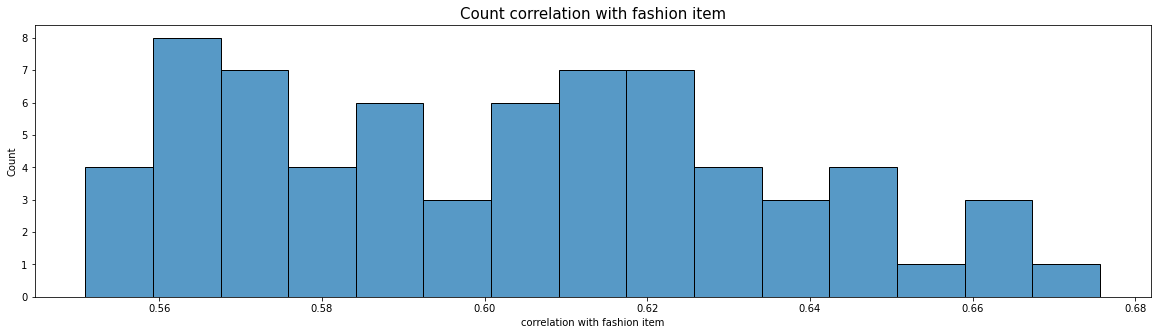

In [53]:
# Visualization of amount correlation values with the relevant feature
axis=plt.subplots(figsize = (20,5))
sns.histplot(data = corr_threshold_1f, x="correlation with fashion item", bins=15);
plt.title("Count correlation with fashion item", size=15)
plt.show()

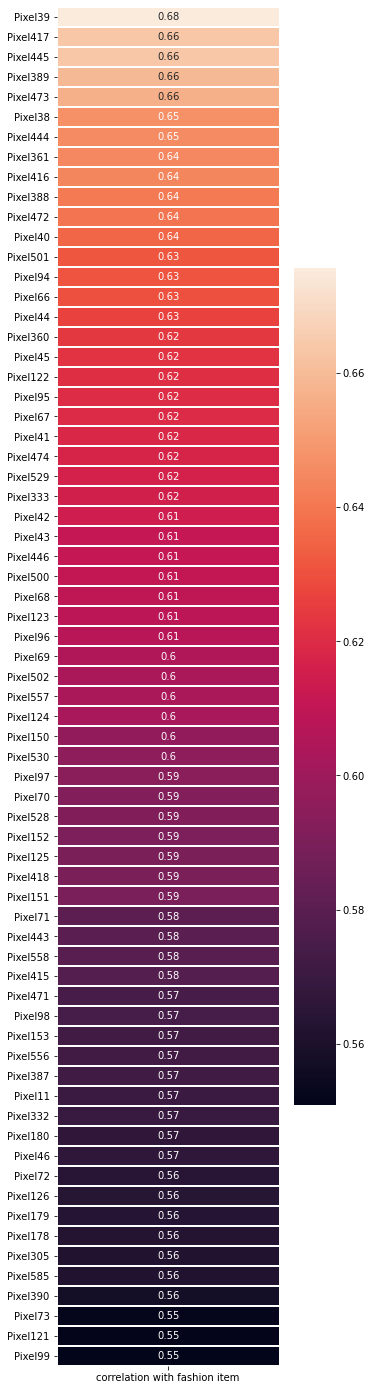

In [54]:
# Plot heatmap to show the corroletion in visually way
fig, ax = plt.subplots(figsize=(5,25))
sns.heatmap(corr_threshold_1f.sort_values(by='correlation with fashion item',ascending=False, ),annot=True ,linewidths=True )
plt.show ();

- In conclusion : <br>
We have come to know that a very small number of pixels have a high correlation on the items <br>
Plus the highest correlation is less than 0.7 so it does not affect the items 

In [55]:
# Create a dummy model Classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,Y_train)
dummy_clf.predict(X)
dummy_clf.score(X,Y)

0.1

- In conclusion : <br>
If the model always classifies something frequently then the highest level of accuracy will be 0.1 which is<br> a very low level of accuracy that any model is capable of beating.<br>
In order to solve this problem we will define Bayes' naive model as the zero model for the simple reason that it works<br> in a way that there is no connection between one feature and another<br>
And on the other hand we get a higher level of accuracy for the zero model

### Model #0 : Naive Bayes

In [56]:
# Using naive bayes model 
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)
y_predict_naive_bayes = naive_bayes.fit(X_train, Y_train).predict(X_test)
naive_bayes_accuracy = accuracy_score(Y_test,y_predict_naive_bayes)

In [57]:
print("The accuracy of the zero model is {:0.4f}%".format(naive_bayes_accuracy*100))

The accuracy of the zero model is 59.1000%


#### Confusion matrix 

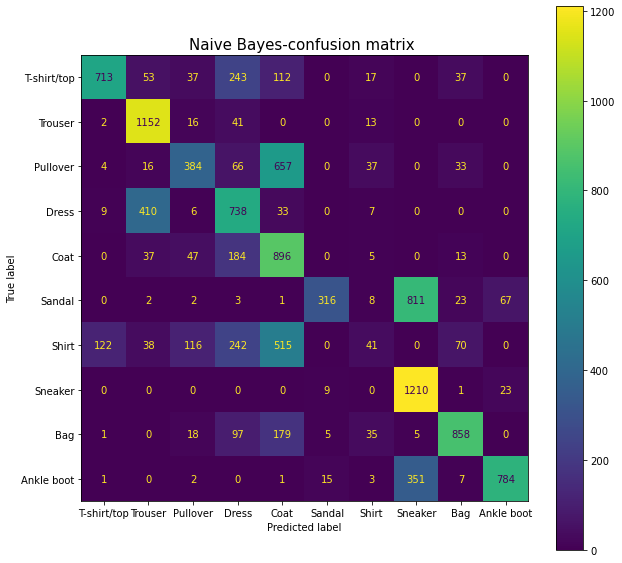

In [58]:
# Plot confusion matrix 
confusion_matrix_naive_bayes = confusion_matrix(Y_test, y_predict_naive_bayes)
ConfusionMatrixDisplay_naive_bayes = ConfusionMatrixDisplay(confusion_matrix_naive_bayes, display_labels=['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Naive Bayes-confusion matrix ", size=15)
ConfusionMatrixDisplay_naive_bayes.plot(ax=ax);

- In conclusion : <br>
the zero model of naive bayes accurecy is about 60% <br>
as a result all other models accurecy should be higer than 60%


## Part 4 : Training and Testing Models

### Model #1 : KNN - K-Nearest Neighbors


In [45]:
# Using Knn model 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_predict_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(Y_test,y_predict_knn)

In [46]:
print("The accuracy of Knn model is {:0.4f}%".format(knn_accuracy*100))

The accuracy of Knn model is 85.6083%


#### Tuning Hyper Parameters with CV

Text(0, 0.5, 'Testing Accuracy')

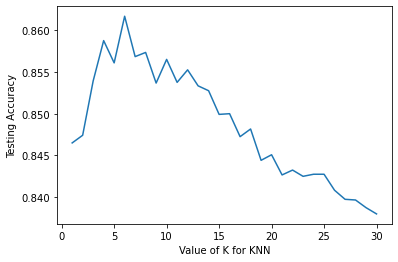

In [165]:
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_predict_knn = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test,y_predict_knn))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [43]:
# Cross validition to find the best n_neighbors parameter
for k in range(1,31,2):
    knn_k = KNeighborsClassifier(n_neighbors = k )
    ValScore = cross_val_score(knn_k, X_train, Y_train, cv = 5).mean()
    print(f"Cross-validation score for k = {k} is:", ValScore)

Cross-validation score for k = 1 is: 0.8393125
Cross-validation score for k = 3 is: 0.8433541666666667
Cross-validation score for k = 5 is: 0.8461041666666667
Cross-validation score for k = 7 is: 0.8452083333333333
Cross-validation score for k = 9 is: 0.844375
Cross-validation score for k = 11 is: 0.842375
Cross-validation score for k = 13 is: 0.8414166666666666
Cross-validation score for k = 15 is: 0.8394375
Cross-validation score for k = 17 is: 0.8386666666666667
Cross-validation score for k = 19 is: 0.8363125
Cross-validation score for k = 21 is: 0.8354166666666667
Cross-validation score for k = 23 is: 0.8341666666666666
Cross-validation score for k = 25 is: 0.8331874999999999
Cross-validation score for k = 27 is: 0.8317916666666667
Cross-validation score for k = 29 is: 0.8313125


In [69]:
print("the best n_neighbors is 5 or 6 we will find it with RandomizedSearchCV ")

the best n_neighbors is 5 or 6 we will find it with RandomizedSearchCV 


#### Tuning Hyper Parameters with RandomizedSearchCV

In [47]:
# Search for parameters to tune
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [65]:
# Define the options of the main parameters
weights = ['uniform','distance']
p = [1,2]
n_neighbors = [5,6]

In [66]:
# Define the param_grid
param_grid = { 'weights': weights ,'p' : p,'n_neighbors':n_neighbors}
print(param_grid)

{'weights': ['uniform', 'distance'], 'p': [1, 2], 'n_neighbors': [5, 6]}


In [67]:
# Using RandomizedSearchCV with 5 Cv
knn_RandomGrid = RandomizedSearchCV(estimator = knn, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = 4)

In [68]:
# Fitting the RandomizedSearchCV with training data  
knn_RandomGrid.fit(X_train, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
                   param_distributions={'n_neighbors': [5, 6], 'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [69]:
# print the best parameters
knn_RandomGrid.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 6}

In [70]:
# Score of the model after tuning
print(knn_RandomGrid.best_score_)

0.8597916666666666


In [78]:
print("The accuracy of Knn model is {:0.4f}%".format(knn_accuracy*100))

The accuracy of Knn model is 86.5667%


In [81]:
# Tuning the metric parameters separately in order to reduce runing time
metric = ['euclidean','manhattan' , 'chebyshev' ,'minkowski', 'wminkowski' ,'seuclidean' , 
          'mahalanobis' , 'haversine' , 'hamming' ,'canberra','braycurtis']

In [82]:
# Define the param_grid
param_grid = {'metric': metric}
print(param_grid)

{'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis', 'haversine', 'hamming', 'canberra', 'braycurtis']}


In [83]:
# Using RandomizedSearchCV with 5 Cv
knn_RandomGrid = RandomizedSearchCV(estimator = knn, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = 4)

In [ ]:
# Fitting the RandomizedSearchCV with training data  
knn_RandomGrid.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
# print the best parameters
knn_RandomGrid.best_params_

In [ ]:
# Score of the model after tuning
print(knn_RandomGrid.best_score_)

In [77]:
# Finally the best score model with tuning hyperparameters
knn = KNeighborsClassifier(algorithm='auto', weights ='distance', p=1, n_neighbors=6, n_jobs=4,metric = '')
knn.fit(X_train, Y_train)
y_predict_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(Y_test,y_predict_knn)

#### Confusion matrix 

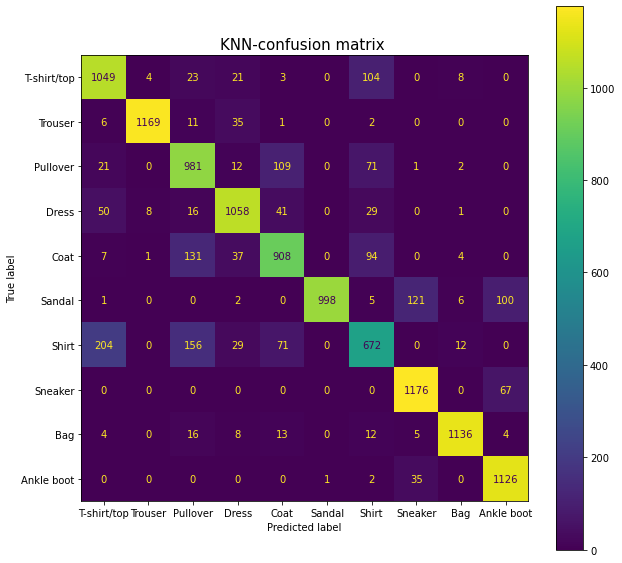

In [257]:
# Plot confusion matrix 
confusion_matrix_knn = confusion_matrix(Y_test, y_predict_knn)
ConfusionMatrixDisplay_knn = ConfusionMatrixDisplay(confusion_matrix_knn, display_labels=['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title("KNN-confusion matrix ", size=15)
ConfusionMatrixDisplay_knn.plot(ax=ax);

### Model #2 : Random Forest

In [51]:
# Using Random Forest model 
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
y_predict_random_forest = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(Y_test,y_predict_random_forest)
random_forest_accuracy

0.8823333333333333

In [52]:
print("The accuracy of Random Forest model is {:0.4f}%".format(random_forest_accuracy*100))

The accuracy of Random Forest model is 88.2333%


#### Tuning Hyper Parameters with RandomizedSearchCV

In [47]:
random_forest.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [48]:
n_estimators = [int(x) for x in np.linspace(start = 900, stop = 1500, num = 2)]
max_features = ['sqrt' , 'log2']
bootstrap = [True, False]
max_depth = [int(x) for x in np.linspace(start = 2, stop = 15, num = 3)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 15, num = 3)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 15, num = 3)]

In [49]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [900, 922, 944, 966, 988, 1011, 1033, 1055, 1077, 1100], 'max_features': ['sqrt', 'log2'], 'max_depth': [2, 8, 15], 'min_samples_split': [2, 8, 15], 'min_samples_leaf': [2, 8, 15], 'bootstrap': [True, False]}


In [50]:
random_forest_RandomGrid = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = 4)

In [ ]:
random_forest_RandomGrid.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
random_forest_RandomGrid.best_params_

In [ ]:
print(random_forest_RandomGrid.best_score_)

#### Confusion matrix 

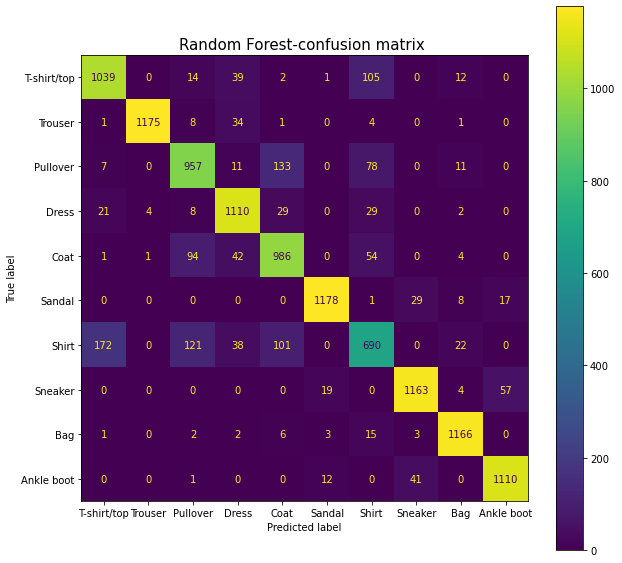

In [258]:
# Plot confusion matrix 
confusion_matrix_random_forest = confusion_matrix(Y_test, y_predict_random_forest)
ConfusionMatrixDisplay_random_forest = ConfusionMatrixDisplay(confusion_matrix_random_forest, display_labels=['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Random Forest-confusion matrix ", size=15)
ConfusionMatrixDisplay_random_forest.plot(ax=ax);

In [ ]:
# Classification Report
random_forest_prec = precision_score(y_predict_random_forest,Y_test)
print('precision:',random_forest_prec)
random_forest_recall = recall_score(y_predict_random_forest,Y_test)
print('recall:',random_forest_recall)
random_forest_f1 = f1_score(y_predict_random_forest,Y_test)
print('f1:',random_forest_f1)
random_forest_acc = accuracy_score(y_predict_random_forest,Y_test)
print("f2:",metrics.fbeta_score(y_predict_random_forest,Y_test, beta=3))
print('accuracy:',random_forest_accuracy)

### Model #3 : Logistic Regression

In [53]:
# Using Logistic Regression model 
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
y_predict_logistic_regression = logistic_regression.predict(X_test)
logistic_regression_accuracy = accuracy_score(Y_test,y_predict_logistic_regression)

In [54]:
print("The accuracy of Random Forest model is {:0.4f}%".format(logistic_regression_accuracy*100))

The accuracy of Random Forest model is 85.5000%


#### Confusion matrix 

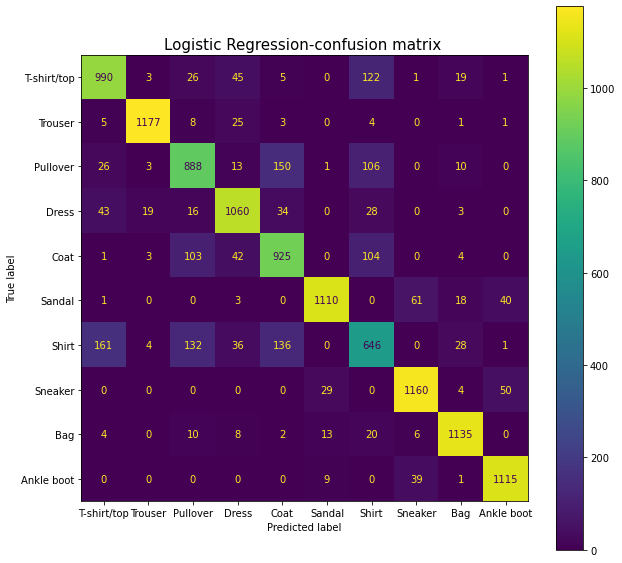

In [262]:
# Plot confusion matrix 
confusion_matrix_logistic_regression = confusion_matrix(Y_test, y_predict_logistic_regression)
ConfusionMatrixDisplay_logistic_regression = ConfusionMatrixDisplay(confusion_matrix_logistic_regression , display_labels=['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Logistic Regression-confusion matrix ", size=15)
ConfusionMatrixDisplay_logistic_regression.plot(ax=ax);

### Model #4 : AdaBoost

In [64]:
# Using AdaBoost Voting model
random_forest = RandomForestClassifier(n_estimators=10)
ada_boost = AdaBoostClassifier(n_estimators=10,learning_rate= 0.1, base_estimator=random_forest)
ada_boost.fit(X_train, Y_train)
y_predict_ada_boost = ada_boost.predict(X_test)
ada_accuracy = accuracy_score(Y_test,y_predict_ada_boost)

In [58]:
print("The accuracy of AdaBoost model is {:0.4f}%".format(ada_accuracy*100))

The accuracy of AdaBoost model is 88.5083%


#### Confusion matrix 

In [ ]:
# Plot confusion matrix 
confusion_matrix_ada_boost = confusion_matrix(Y_test, y_predict_ada_boost)
ConfusionMatrixDisplay_ada_boost = ConfusionMatrixDisplay(confusion_matrix_ada_boost , display_labels=['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title("AdaBoost-confusion matrix ", size=15)
ConfusionMatrixDisplay_ada_boost.plot(ax=ax);

### Model #5 : Hard and Soft Voting

##### Hard Voting

In [59]:
# Using Hard and Soft Voting model
model_1 = knn
model_2 = random_forest
model_3 = logistic_regression
model_4 = ada_boost

In [60]:
hard_voting = VotingClassifier(estimators=[('knn', model_1), ('random_forest', model_2), ('logistic_regression', model_3),('ada_boost',model_4)], voting='hard')
hard_voting.fit(X_train, Y_train)
y_predict_hard_voting = hard_voting.predict(X_test)
hard_voting_accuracy = accuracy_score(Y_test,y_predict_hard_voting)

In [61]:
print("The accuracy of Hard Voting model is {:0.4f}%".format(hard_voting_accuracy*100))

The accuracy of Hard Voting model is 88.0333%


##### Soft Voting

In [62]:
soft_voting = VotingClassifier(estimators=[('knn', model_1), ('random_forest', model_2), ('logistic_regression', model_3),('ada_boost',model_4)], voting='soft')
soft_voting.fit(X_train, Y_train)
y_predict_soft_voting = soft_voting.predict(X_test)
soft_voting_accuracy = accuracy_score(Y_test,y_predict_soft_voting)

In [63]:
print("The accuracy of Soft Voting model is {:0.4f}%".format(soft_voting_accuracy*100))

The accuracy of Soft Voting model is 88.6167%
